Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Open Data

In [2]:
df = pd.read_csv('../../train.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Take 50% of the Data

In [3]:
df_sample = df.sample(frac=0.50, random_state=42)

In [4]:
rows = df_sample.to_dict(orient="records")
rows

[{'id': 'id2793718',
  'vendor_id': 2,
  'pickup_datetime': '2016-06-08 07:36:19',
  'dropoff_datetime': '2016-06-08 07:53:39',
  'passenger_count': 1,
  'pickup_longitude': -73.98561096191406,
  'pickup_latitude': 40.735942840576165,
  'dropoff_longitude': -73.98033142089844,
  'dropoff_latitude': 40.76046752929688,
  'store_and_fwd_flag': 'N',
  'trip_duration': 1040},
 {'id': 'id3485529',
  'vendor_id': 2,
  'pickup_datetime': '2016-04-03 12:58:11',
  'dropoff_datetime': '2016-04-03 13:11:58',
  'passenger_count': 1,
  'pickup_longitude': -73.9783935546875,
  'pickup_latitude': 40.76435089111328,
  'dropoff_longitude': -73.99162292480467,
  'dropoff_latitude': 40.749858856201165,
  'store_and_fwd_flag': 'N',
  'trip_duration': 827},
 {'id': 'id1816614',
  'vendor_id': 2,
  'pickup_datetime': '2016-06-05 02:49:13',
  'dropoff_datetime': '2016-06-05 02:59:27',
  'passenger_count': 5,
  'pickup_longitude': -73.98905944824217,
  'pickup_latitude': 40.744388580322266,
  'dropoff_longitud

Sequential Processing using Quick Short

In [5]:
def quick_sort_rows(data):
    if len(data) <= 1:
        return data
    pivot = data[len(data) // 2]
    pivot_val = pivot["trip_duration"]
    left = [r for r in data if r["trip_duration"] < pivot_val]
    middle = [r for r in data if r["trip_duration"] == pivot_val]
    right = [r for r in data if r["trip_duration"] > pivot_val]
    return quick_sort_rows(left) + middle + quick_sort_rows(right)

In [6]:
sorted_rows = quick_sort_rows(rows)
df_sorted = pd.DataFrame(sorted_rows)
df_sorted.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2959956,1,2016-02-25 04:26:50,2016-02-25 04:26:51,1,-73.806152,40.660206,-73.806267,40.660049,N,1
1,id2697717,2,2016-03-27 12:55:52,2016-03-27 12:55:53,2,-73.983154,40.767159,-73.983238,40.767097,N,1
2,id0900936,2,2016-02-24 22:14:20,2016-02-24 22:14:21,1,-74.004005,40.745125,-74.003998,40.745144,N,1
3,id0839864,1,2016-02-06 13:40:27,2016-02-06 13:40:28,1,-73.987991,40.724083,-73.987991,40.724079,N,1
4,id2072503,1,2016-01-20 05:53:45,2016-01-20 05:53:46,1,-73.807213,40.658192,-73.807259,40.658051,N,1


Data Visualization

In [7]:
plt.plot(df_sample["trip_duration"], marker='o', linestyle='-', markersize=2, color='green')
plt.title("Unsorted data of Trip Duration")
plt.xlabel("Index (Sorted Order)")
plt.ylabel("Trip Duration (seconds)")
plt.grid(True)
plt.show()

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 640x480 with 1 Axes>

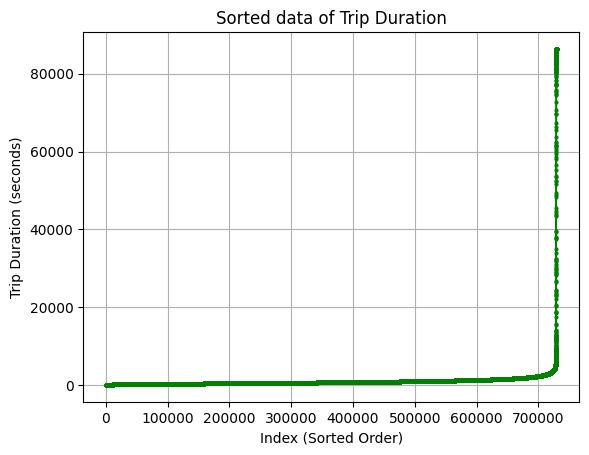

In [9]:
plt.plot(df_sorted["trip_duration"], marker='o', linestyle='-', markersize=2, color='green')
plt.title("Sorted data of Trip Duration")
plt.xlabel("Index (Sorted Order)")
plt.ylabel("Trip Duration (seconds)")
plt.grid(True)
plt.show()